# Objectifs


-La préparation des données a pour but de charger les données, de les formater pour les rendre analysables et de filtrer les valeurs incohérentes.(plages horaires, de régularité temporelle. et de remplissage des données manquantes)

-L’exploration des données (la série est-elle stationnaire ? La stationnarité veut dire que les statistiques de la série temporelle n’évoluent pas.,La série a-t-elle des périodicités? Périodicité journalière, hebdomadaire, annuelle…,La série dépend-elle d’autres séries temporelles?)

-Analyse des données(le nettoyage des ‘mauvaises valeurs’, la prédiction, la détection d’événements anormaux (par exemple détection de fautes dans un équipement)

In [1]:
#%matplotlib notebook
import math                         # import a package
import numpy as np                  # import a package with specified name
from sklearn import linear_model    # import whole module
from os import mkdir, rmdir, path   # import a function
from inspect import getsourcelines 
import random
import string
import time
import pandas as pd
import urllib
import zipfile
import matplotlib.pyplot as plt     # for plots
import seaborn as sns               # for plots
import sys

#sns.set_palette("colorblind")
#color_blind_list = sns.color_palette("colorblind", 8)

#  Introduction: Pandas, Matplotlib, etc.

On utilise la base de données Individual household electric power consumption Data Set .
Pour cela utiliser les commandes ci-dessous :

## Question 1:
Chargement de la base de données. 

a) Telechargement des données via web

c'est un peu long donc passez directement à la cellule suivante

In [2]:
"""
# download part si necessaire
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename

# testing existence of file:

if sys.version_info >= (3, 0):
    if not(path.isfile('zipfilename')):
        urllib.request.urlretrieve(Location, zipfilename)
else:
    if not(path.isfile('zipfilename')):
        urllib.urlretrieve(Location, zipfilename)

# unzip part
zip = zipfile.ZipFile(zipfilename)
zip.extractall()
"""

"\n# download part si necessaire\nurl = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'\nfilename = 'household_power_consumption'\nzipfilename = filename + '.zip'\nLocation = url + zipfilename\n\n# testing existence of file:\n\nif sys.version_info >= (3, 0):\n    if not(path.isfile('zipfilename')):\n        urllib.request.urlretrieve(Location, zipfilename)\nelse:\n    if not(path.isfile('zipfilename')):\n        urllib.urlretrieve(Location, zipfilename)\n\n# unzip part\nzip = zipfile.ZipFile(zipfilename)\nzip.extractall()\n"

b) chargement du fichier source extrait

household_power_consumption.txt

In [9]:
pd.read_csv('/content/household_power_consumption.txt')

,Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
0,16/12/2006;17:24:00;4.216;0.418;234.840;18.400...
1,16/12/2006;17:25:00;5.360;0.436;233.630;23.000...
2,16/12/2006;17:26:00;5.374;0.498;233.290;23.000...
3,16/12/2006;17:27:00;5.388;0.502;233.740;23.000...
4,16/12/2006;17:28:00;3.666;0.528;235.680;15.800...
...,...
490119,22/11/2007;02:03:00;0.226;0.000;246.070;1.000;...
490120,22/11/2007;02:04:00;0.226;0.000;246.000;1.000;...
490121,22/11/2007;02:05:00;0.226;0.000;246.260;1.000;...
490122,22/11/2007;02:06:00;0.226;0.000;246.570;1.000;...


In [11]:
df=pd.read_csv('household_power_consumption.txt',sep=";")
df.head()



,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [7]:
df.shape

(311592, 9)

In [8]:

df.isna().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       1
Voltage                     1
Global_intensity            1
Sub_metering_1              1
Sub_metering_2              1
Sub_metering_3           3906
dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



c) Détecter et dénombrer le nombre de lignes ayant des valeurs manquantes.


nb: .isna() ou isnull()

In [ ]:
#TBD
df.isna()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
843770,False,False,False,False,False,False,False,False,False
843771,False,False,False,False,False,False,False,False,False
843772,False,False,False,False,False,False,False,False,False
843773,False,False,False,False,False,False,False,False,False


d) De quoi parle ce dataset ?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843775 entries, 0 to 843774
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   843775 non-null  object 
 1   Time                   843775 non-null  object 
 2   Global_active_power    843775 non-null  object 
 3   Global_reactive_power  843775 non-null  object 
 4   Voltage                843775 non-null  object 
 5   Global_intensity       843774 non-null  object 
 6   Sub_metering_1         843774 non-null  object 
 7   Sub_metering_2         843774 non-null  object 
 8   Sub_metering_3         839829 non-null  float64
dtypes: float64(1), object(8)
memory usage: 57.9+ MB


## Question 3:
 Utiliser ```to_datetime``` et ```set_index``` pour créer un Data Frame dont l'index est dans un format "date"  (on prendra garde au format des dates internationales qui diffère du format français).

Construiser les colonnes Date et Time pour cela

In [ ]:
# TBD
df.index=pd.to_datetime(df['Date']+' '+df['Time'], infer_datetime_format=True, dayfirst=True) 
df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


## Question 3:

Remplacer/corriger les nans et caracteres spéciaux ('?')

- Identifier la/les plages horraires de pertes d'information


In [ ]:
# TBD
df['Global_active_power'].value_counts()


0.218    6147
0.216    5905
0.220    5829
0.222    5682
0.224    5549
         ... 
7.140       1
7.746       1
7.290       1
7.840       1
6.640       1
Name: Global_active_power, Length: 4006, dtype: int64

- Trouver une methodes pour remplacer ou enlever les lignes des valeurs manquantes



In [ ]:
# TBD
df[df['Sub_metering_3'].isna()]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2006-12-21 11:23:00,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
2006-12-21 11:24:00,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
2006-12-30 10:08:00,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
2006-12-30 10:09:00,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
2007-01-14 18:36:00,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
2008-05-16 19:24:00,16/5/2008,19:24:00,?,?,?,?,?,?,NaN
2008-06-13 18:52:00,13/6/2008,18:52:00,?,?,?,?,?,?,NaN
2008-07-13 20:26:00,13/7/2008,20:26:00,?,?,?,?,?,?,NaN
2008-07-13 20:27:00,13/7/2008,20:27:00,?,?,?,?,?,?,NaN


- Mettre les colonnes numeriques au format float

sauf Date et Time

In [ ]:
# TBD
for colonne in df.columns:
    try:
        df[colonne]=df[colonne].astype(float)
    except:
        print(colonne)
        continue
        
df.info()


Date
Time
Global_active_power
Global_reactive_power
Voltage
Global_intensity
Sub_metering_1
Sub_metering_2
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 843775 entries, 2006-12-16 17:24:00 to 2008-07-24 16:18:00
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   843775 non-null  object 
 1   Time                   843775 non-null  object 
 2   Global_active_power    843775 non-null  object 
 3   Global_reactive_power  843775 non-null  object 
 4   Voltage                843775 non-null  object 
 5   Global_intensity       843774 non-null  object 
 6   Sub_metering_1         843774 non-null  object 
 7   Sub_metering_2         843774 non-null  object 
 8   Sub_metering_3         839829 non-null  float64
dtypes: float64(1), object(8)
memory usage: 64.4+ MB


Creer une colonne "jds" (numero du jour de la semaine) et calculer les valeurs moyennes par jour de la semaine

In [ ]:
# TBD
jds = df.index.weekday
df['jds']= df.index.weekday
df.groupby('jds').mean()


,Sub_metering_3
jds,
0,5.886839
1,5.899592
2,5.884500
3,5.359714
4,6.472639
5,7.091715
6,5.831224


#### On ne s'interresse qu'à la variable active power

In [ ]:
df=pd.DataFrame(df['Global_active_power'])
df.head()

,Global_active_power
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


## Question 4:
Afficher le graphique des moyennes journalières entre le 1er janvier et le 30 avril 2007.  On pourra utiliser en plus de ```matplotlib``` le package ```seaborn``` pour améliorer le rendu visuel.
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html

Proposer une cause expliquant la consommation fin février et début avril.


nb: Pensez à changer le format des colonnes, vous comprenez qu'un moyenne ne se calcule qu'avec des données numeriques



In [ ]:
df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,jds
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,5
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,5
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,5
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,5
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,5


### PAUSE / Veille :


la série est-elle stationnaire ? 

La série a-t-elle des périodicités? 

Périodicité journalière, hebdomadaire, annuelle…

La série dépend-elle d’autres séries temporelles?


#### Tracer l'evolution de cette puissance electrique appellee par jour/semaine/mois pour repondre à cette question 

In [ ]:
pd.read_csv('/TG_STAID011249.txt')

ParserError: ignored

## Question 5: 
Charger les données du fichier TG_STAID011249.txt avec ```pandas```, et ne garder que les colonnes ```DATE``` et ```TG```.


Diviser par 10 la colonne TG pour obtenir des températures en degrés Celsius.


Traiter les éléments de température aberrants comme des ```NaN```.

Ne conserver que les temperatures > -273.15 °C

In [ ]:
df1=pd.read_csv('/TG_STAID011249.txt',comment='#')
print(df1.columns)
df1.head()

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')


,STAID,SOUID,DATE,TG,Q_TG
0,11249,71642,19210301,50,0
1,11249,71642,19210302,46,0
2,11249,71642,19210303,46,0
3,11249,71642,19210304,31,0
4,11249,71642,19210305,95,0


In [ ]:
# TBD
df1.columns=[elem.strip() for elem in df1.columns]
df1["TG"] = df1["TG"]/10
df1.head()

,STAID,SOUID,DATE,TG,Q_TG
0,11249,71642,19210301,0.050,0
1,11249,71642,19210302,0.046,0
2,11249,71642,19210303,0.046,0
3,11249,71642,19210304,0.031,0
4,11249,71642,19210305,0.095,0


In [ ]:
# TBD
df1=df1[df1['TG'] > -273.15]


In [ ]:
# TBD


,DATE,TG
count,2.649600e+04,26496.000000
mean,1.978947e+07,11.302351
std,2.305108e+05,6.605035
min,1.921030e+07,-13.700000
25%,1.962041e+07,6.400000
50%,1.980052e+07,11.400000
75%,1.998071e+07,16.400000
max,2.016083e+07,31.600000


# Question 6:

Créer un DataFrame des températures journalières entre le 1er janvier et le 30 avril 2007. 

Parser la colonne DATE et l'imposer en index pour realiser cette operation

In [ ]:
# TBD


In [ ]:
# TBD


Afficher sur un même graphique ces températures et la séries *Global_active_power*.

In [ ]:
# TBD


## Question 7:
On considère maintenant le jeu de données ```20080421_20160927-PA13_auto.csv```.


In [ ]:
my_file ='20080421_20160927-PA13_auto.csv'

# skiprows remove the first line, so is the comment='#' option
polution_df = pd.read_csv(my_file, sep=';',
                          na_values="n/d",
                          converters={'heure': str},
                          skiprows=2,
                          names=["date", "heure", "NO2", "O3"],
                         )

# check issues with 24:00 several variants can be accepted without more details on the 
# way the dataset was created.
# https://www.tutorialspoint.com/python/time_strptime.htm

polution_df['heure'] = polution_df['heure'].replace('24', '0')
time_improved = pd.to_datetime(polution_df['date'] +
                               ' ' + polution_df['heure'] + ':00',
                               format='%d/%m/%Y %H:%M')


polution_df['DateTime'] = time_improved
del polution_df['heure']
del polution_df['date']

polution_ts = polution_df.set_index(['DateTime'])
polution_ts = polution_ts.sort_index()
polution_ts.head()


FileNotFoundError: ignored

Proposer une visualisation de la pollution pour l'ozone sur la période d'étude.

<AxesSubplot:xlabel='DateTime'>

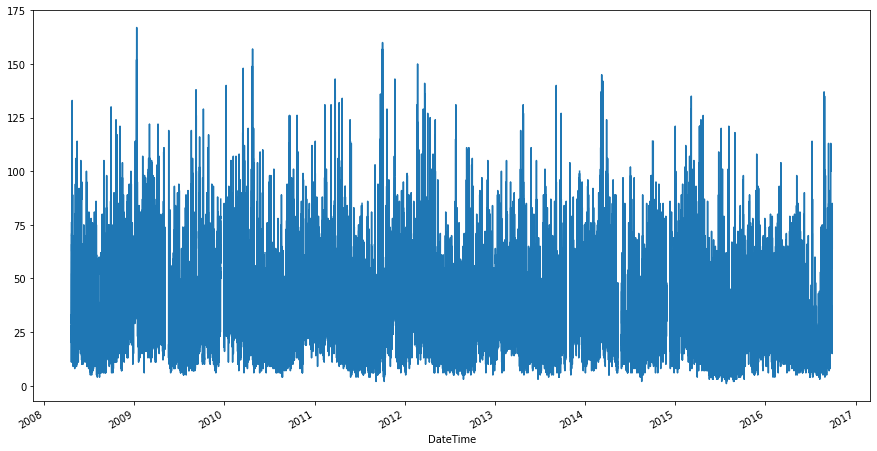

In [ ]:
#TBD
Polution_ts['03'].resample('M').mean().plot(figsize=(16,10))
Polution_ts[['03','NO2']].resample('M').mean().plot(figsize=(16,10))

# Question 8:
 Proposer une visualisation de la pollution la plus critique (les max) par année pour l'ozone et pour pour le
dioxyde d'azote.

In [ ]:
#TBD 


## Question 9:
Donner une représentation par semaine de la pollution. Quelles est la periode la plus polluée pour l'ozone, pour le dioxyde de souffre?

In [ ]:
#TBD 

In [ ]:
# TBD

###:


la série est-elle stationnaire ? 

La série a-t-elle des périodicités? 

Périodicité journalière, hebdomadaire, annuelle…

La série dépend-elle d’autres séries temporelles?